In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2


# Define paths
train_folder = 'E:/Thesis/lip_train'
test_folder = 'E:/Thesis/lip'

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define image dimensions
image_width, image_height = 224, 224

# Preprocess and augment the training data with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data for validation
)

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='training'  # Use subset='training' for training data
)

# Generate batches of validation data
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='validation'  # Use subset='validation' for validation data
)

# Generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    shuffle=False  # Important to keep the order for evaluation
)

# Load the ResNet50V2 model pre-trained on ImageNet
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification layers on top
model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

# Train the model
history_resnet = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Evaluate the model on the test data
loss, accuracy, precision, recall = model.evaluate(test_generator)

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Found 5688 images belonging to 367 classes.
Found 1422 images belonging to 367 classes.
Found 711 images belonging to 367 classes.
Epoch 1/10


C:\Users\Hasib\.virtualenvs\Thesis-oLZqZqna\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.0132 - loss: 5.6417 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1238 - val_loss: 4.5307 - val_precision: 1.0000 - val_recall: 0.0014
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.1073 - loss: 4.5666 - precision: 0.6313 - recall: 6.4864e-04 - val_accuracy: 0.3186 - val_loss: 3.3105 - val_precision: 1.0000 - val_recall: 0.0253
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.2586 - loss: 3.5193 - precision: 0.9410 - recall: 0.0286 - val_accuracy: 0.5802 - val_loss: 1.9947 - val_precision: 0.9880 - val_recall: 0.1730
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.4475 - loss: 2.4958 - precision: 0.9365 - recall: 0.1335 - val_accuracy: 0.7321 - val_loss: 1.2686 - val_precision: 0.9625 - val_recall: 0.3790
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.5745 - loss: 1.9143 - precision: 0.9423 - recall: 0.2698 - val_accuracy: 0.8129 - val_lo

In [2]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

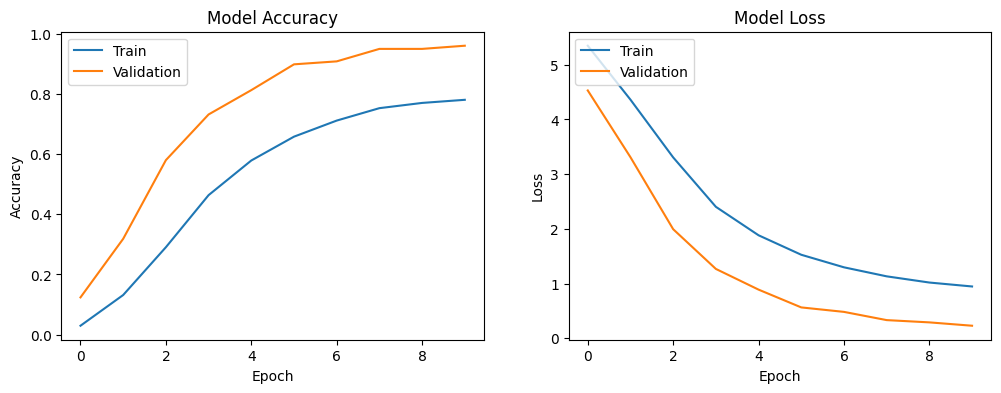

In [3]:
plot_metrics(history_resnet)

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3

# Define paths
train_folder = 'E:/Thesis/lip_train'
test_folder = 'E:/Thesis/lip'

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define image dimensions
image_width, image_height = 299, 299

# Preprocess and augment the training data with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of the data for validation
)

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='training'  # Use subset='training' for training data
)

# Generate batches of validation data
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='validation'  # Use subset='validation' for validation data
)

# Generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    shuffle=False  # Important to keep the order for evaluation
)

# Load the InceptionV3 model pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification layers on top
model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

# Train the model
history_inception = model.fit(train_generator, validation_data=validation_generator, epochs=15)

# Evaluate the model on the test data
loss, accuracy, precision, recall = model.evaluate(test_generator)

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Found 5688 images belonging to 367 classes.
Found 1422 images belonging to 367 classes.
Found 711 images belonging to 367 classes.
Epoch 1/15


C:\Users\Hasib\.virtualenvs\Thesis-oLZqZqna\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.0171 - loss: 5.6352 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0963 - val_loss: 4.6698 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.0854 - loss: 4.7121 - precision: 0.5329 - recall: 3.3863e-04 - val_accuracy: 0.2700 - val_loss: 3.6298 - val_precision: 0.9167 - val_recall: 0.0077
Epoch 3/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.2141 - loss: 3.8753 - precision: 0.9541 - recall: 0.0111 - val_accuracy: 0.4747 - val_loss: 2.4628 - val_precision: 0.9823 - val_recall: 0.0781
Epoch 4/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.3564 - loss: 2.9968 - precision: 0.9427 - recall: 0.0707 - val_accuracy: 0.6758 - val_loss: 1.6349 - val_precision: 0.9812 - val_recall: 0.2567
Epoch 5/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.5144 - loss: 2.2799 - precision: 0.9556 - recall: 0.1871 - val_accuracy: 0.8214 

In [2]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

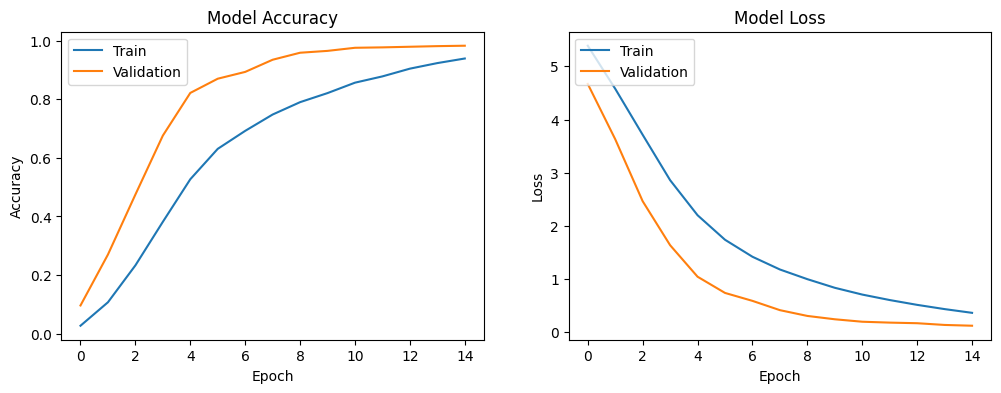

In [3]:
plot_metrics(history_inception)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2

# Define paths
train_folder = 'E:/Thesis/lip_train'
test_folder = 'E:/Thesis/lip'

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define image dimensions
image_width, image_height = 224, 224

# Preprocess and augment the training data with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='training'  # Use subset='training' for training data
)

# Generate batches of validation data
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='validation'  # Use subset='validation' for validation data
)

# Generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    shuffle=False  # Important to keep the order for evaluation
)

# Load the ResNet50V2 model pre-trained on ImageNet
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Unfreeze more layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Add custom classification layers on top
model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

# Define callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
]

# Train the model
history_resnet = model.fit(train_generator, validation_data=validation_generator, epochs=10, callbacks=callbacks)

# Evaluate the model on the test data
loss, accuracy, precision, recall = model.evaluate(test_generator)

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Found 5688 images belonging to 367 classes.
Found 1422 images belonging to 367 classes.
Found 711 images belonging to 367 classes.
Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 858s 5s/step - accuracy: 0.0023 - loss: 7.0191 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0302 - val_loss: 6.2167 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/10
 99/178 ━━━━━━━━━━━━━━━━━━━━ 5:51 4s/step - accuracy: 0.0207 - loss: 6.3516 - precision: 0.0000e+00 - recall: 0.0000e+00

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2


# Define paths
train_folder = 'E:/Thesis/lip_train'
test_folder = 'E:/Thesis/lip_test'

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define image dimensions
image_width, image_height = 224, 224

# Preprocess and augment the training data with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data for validation
)

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='training'  # Use subset='training' for training data
)

# Generate batches of validation data
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='validation'  # Use subset='validation' for validation data
)

# Generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    shuffle=False  # Important to keep the order for evaluation
)

# Load the ResNet50V2 model pre-trained on ImageNet
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification layers on top
model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

# Train the model
history_resnet = model.fit(train_generator, validation_data=validation_generator, epochs=15)

# Evaluate the model on the test data
loss, accuracy, precision, recall = model.evaluate(test_generator)

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Found 5688 images belonging to 367 classes.
Found 1422 images belonging to 367 classes.
Found 6399 images belonging to 367 classes.
Epoch 1/15


C:\Users\Hasib\.virtualenvs\Thesis-oLZqZqna\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.0132 - loss: 5.6673 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1371 - val_loss: 4.6096 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.1049 - loss: 4.6311 - precision: 0.6592 - recall: 2.9640e-04 - val_accuracy: 0.3298 - val_loss: 3.2442 - val_precision: 0.9600 - val_recall: 0.0169
Epoch 3/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.2570 - loss: 3.4898 - precision: 0.9546 - recall: 0.0237 - val_accuracy: 0.5752 - val_loss: 2.0425 - val_precision: 0.9864 - val_recall: 0.1533
Epoch 4/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.4369 - loss: 2.5482 - precision: 0.9268 - recall: 0.1149 - val_accuracy: 0.7412 - val_loss: 1.3079 - val_precision: 0.9482 - val_recall: 0.3474
Epoch 5/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.5424 - loss: 2.0273 - precision: 0.9276 - recall: 0.2389 - val_accuracy: 0.8509 

In [2]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

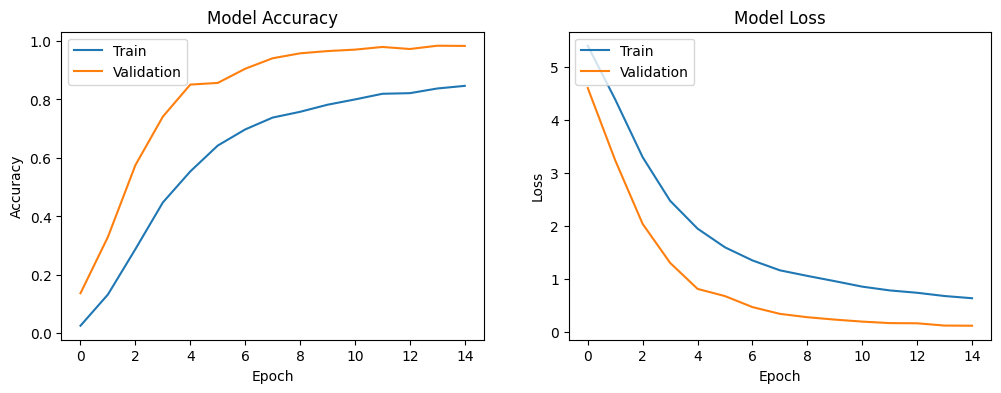

In [3]:
plot_metrics(history_resnet)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Define paths
train_folder = 'E:/Thesis/lip_train'
test_folder = 'E:/Thesis/lip'

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define image dimensions
image_width, image_height = 224, 224

# Preprocess and augment the training data with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical',
    seed=seed,
    subset='training'  # Use subset='training' for training data
)

# Generate batches of validation data
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical',
    seed=seed,
    subset='validation'  # Use subset='validation' for validation data
)

# Generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical',
    seed=seed,
    shuffle=False  # Important to keep the order for evaluation
)

# Load the ResNet50V2 model pre-trained on ImageNet
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification layers on top
model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalMaxPooling2D(),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history_resnet = model.fit(train_generator, validation_data=validation_generator, epochs=30,callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test data
loss, accuracy, precision, recall = model.evaluate(test_generator)

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Found 5688 images belonging to 367 classes.
Found 1422 images belonging to 367 classes.
Found 711 images belonging to 367 classes.
Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.0056 - loss: 7.3351 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0070 - val_loss: 6.4595 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.0054 - loss: 6.3786 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0070 - val_loss: 6.1948 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
77/89 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.0055 - loss: 6.1559 - precision: 0.0000e+00 - recall: 0.0000e+00